In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('F:/Python/Loan Prediction/archive/train_u6lujuX_CVtuZ9i.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.describe()
#We see that there are missing values from the count

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Dealing with missing values

In [7]:
df.isnull().sum()
#Gender, Married, Self-Employed are categorical with missing values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [9]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
# Counting the dependant values to better understand before filling it up

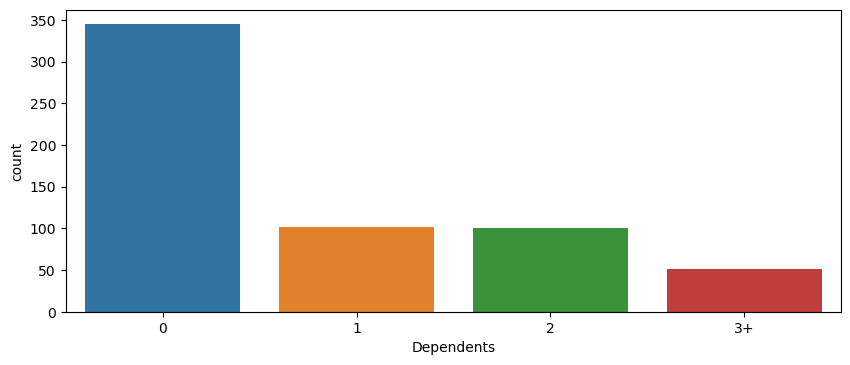

In [11]:
plt.figure(figsize=(10,4),dpi=100)
sns.countplot(x='Dependents',data=df)

In [12]:
# Filling with mode can be of more sense
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])

### Filling up numerical values

In [15]:
# Check for outliers

In [16]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

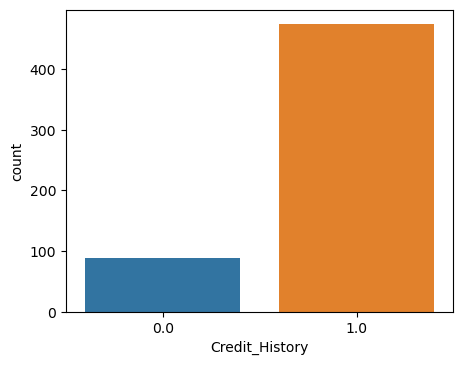

In [18]:
plt.figure(figsize=(5,4),dpi=100)
sns.countplot(x='Credit_History',data=df)

In [19]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

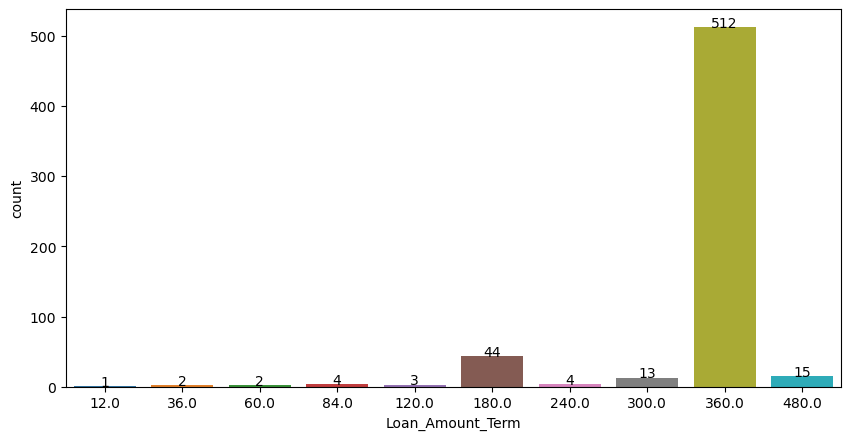

In [42]:
plt.figure(figsize=(10,5),dpi=100)
splot=sns.countplot(x='Loan_Amount_Term',data=df)
for p in splot.patches:
    splot.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),ha='center')

In [43]:
# Replacing Loan amounts with 360 since it is most repeated

In [44]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

In [45]:
#Check Loan Amount

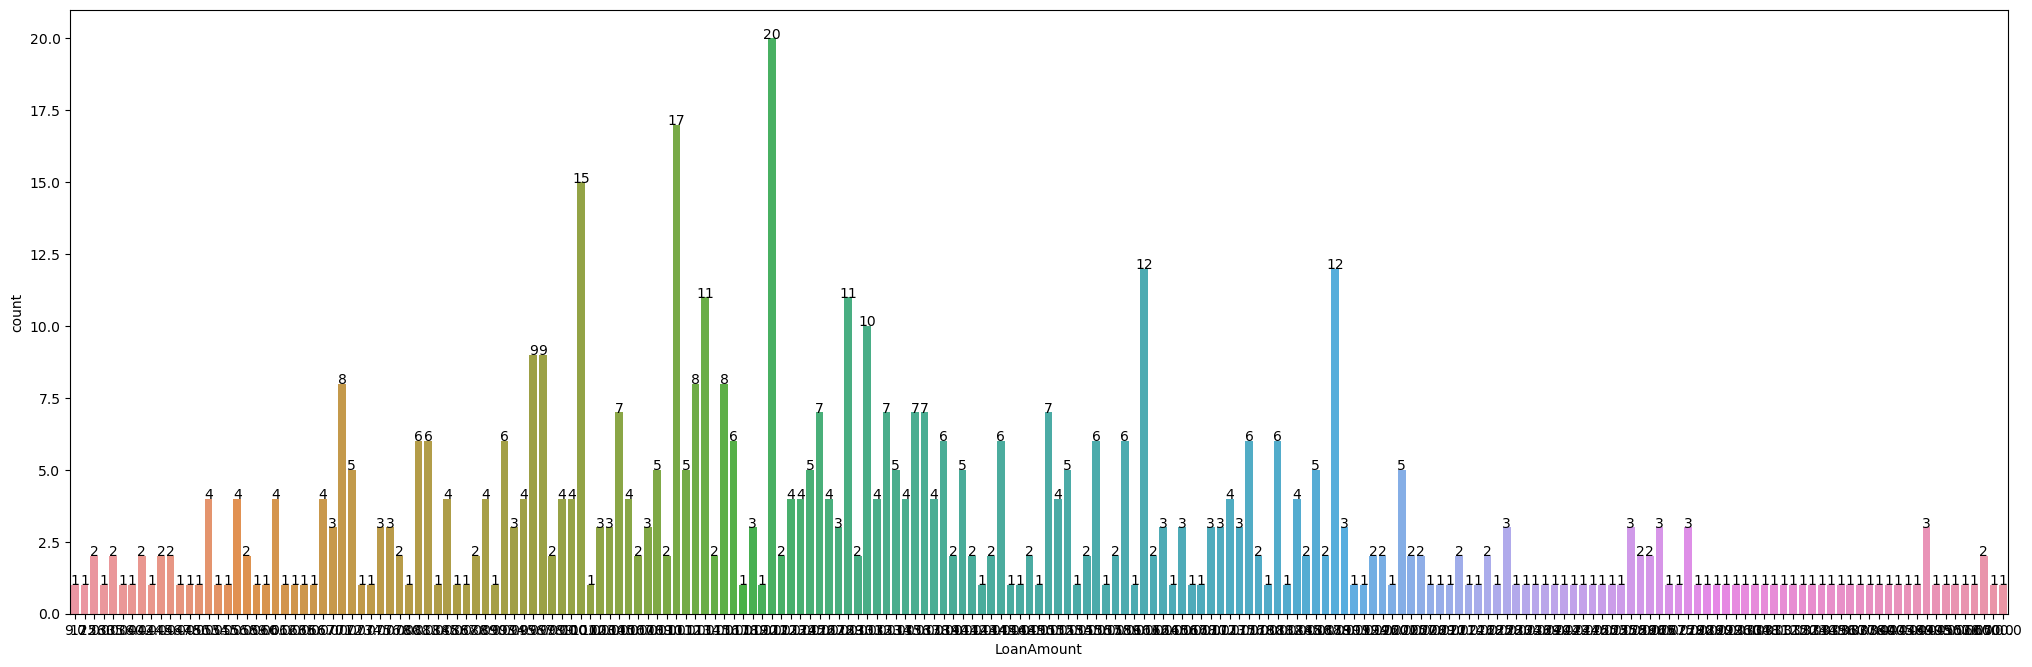

In [51]:
plt.figure(figsize=(25,8),dpi=100)
splot=sns.countplot(x='LoanAmount',data=df)
for p in splot.patches:
    splot.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),ha='center')

In [52]:
# Here mode will not work. So we look for mean and median.
#Check for Outliers since mean is affected by outliers; but median is not

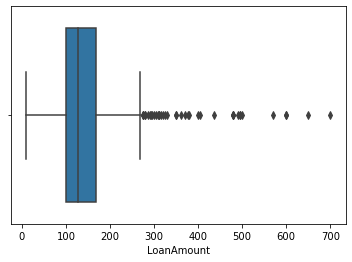

In [53]:
sns.boxplot(x='LoanAmount',data=df)

In [54]:
#Outliers are present
#Check hom many outliers

In [61]:
Q1=df['LoanAmount'].quantile(0.25)
Q3=df['LoanAmount'].quantile(0.75)
IQR=Q3-Q1

In [62]:
Q1

100.0

In [63]:
Q2

168.0

In [64]:
IQR

68.0

In [66]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print('low_limit is', low_lim)
print('low_limit is', up_lim)

low_limit is -2.0
low_limit is 270.0


In [67]:
outlier=[]
for x in df['LoanAmount']:
    if (x<low_lim) or (x>up_lim):
        outlier.append(x)
print ('Outliers in dataset are',outlier)
print('lenght of outlier is',len(outlier))

Outliers in dataset are [349.0, 315.0, 320.0, 286.0, 312.0, 370.0, 650.0, 290.0, 600.0, 275.0, 700.0, 495.0, 280.0, 279.0, 304.0, 330.0, 436.0, 480.0, 300.0, 376.0, 490.0, 308.0, 570.0, 380.0, 296.0, 275.0, 360.0, 405.0, 500.0, 480.0, 311.0, 480.0, 400.0, 324.0, 600.0, 275.0, 292.0, 350.0, 496.0]
lenght of outlier is 39


In [69]:
# 39 outliers are present in total which amounts to 6.5% of data
# We use median to replace the outliers, since median is not affected by outliers

In [73]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())

In [74]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Checking for data imbalance

In [81]:
df['Loan_Status'].value_counts('Y')

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [82]:
# Seems balanced

## EDA

In [83]:
df['Loan_Status'].replace('N',0,inplace=True)
df['Loan_Status'].replace('Y',1,inplace=True)

In [84]:
df['Loan_Status']

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [85]:
#Credit History Vs Loan Status

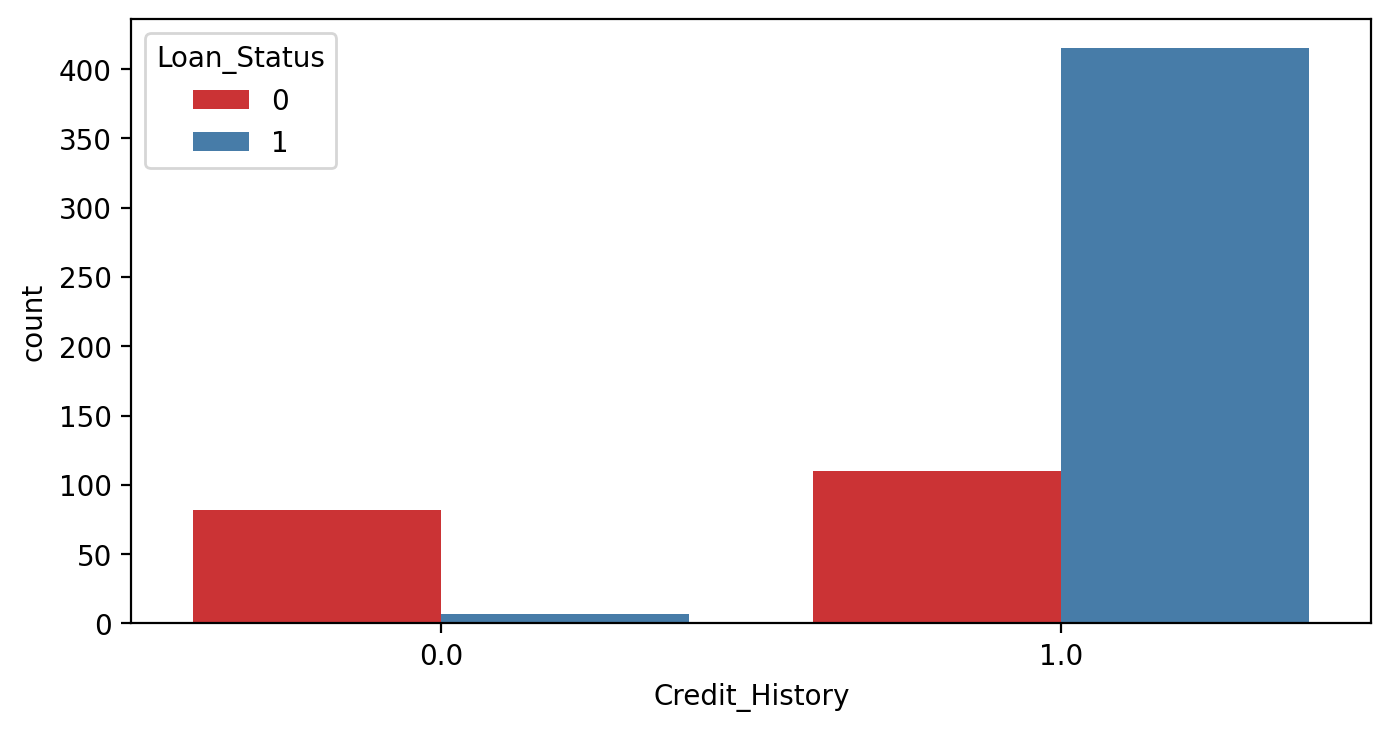

In [88]:
plt.figure(figsize=(8,4),dpi=200)
sns.countplot(x='Credit_History',data=df,hue='Loan_Status',palette='Set1')

C:\Users\sayankrmkr\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


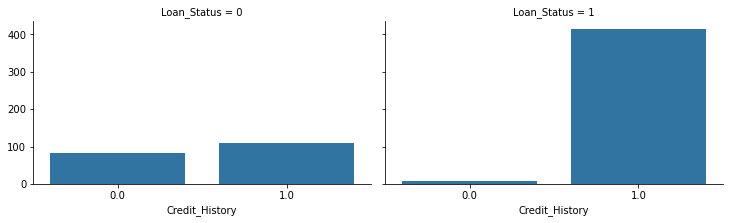

In [90]:
grid=sns.FacetGrid(data=df,col='Loan_Status',height=3.2,aspect=1.6)
grid.map(sns.countplot,'Credit_History')

In [91]:
# Gender vs Loan_Status 

C:\Users\sayankrmkr\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


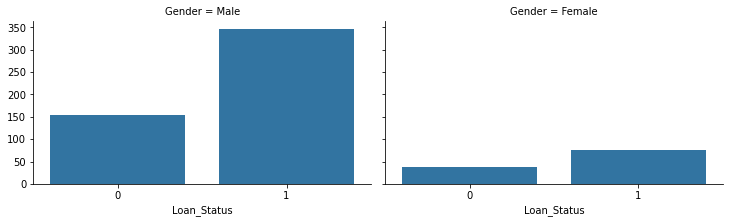

In [100]:
grid=sns.FacetGrid(data=df,col="Gender",height=3.2, aspect=1.6)
grid.map(sns.countplot,'Loan_Status')

In [101]:
# Chances of getting loan by a female is more high

In [103]:
# Married vs Loan Status

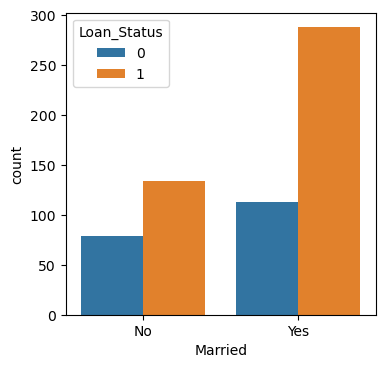

In [111]:
plt.figure(figsize=(4,4), dpi=100)
sns.countplot(data=df,x='Married',hue='Loan_Status' )

In [112]:
# Married people have more chances of getting loan

In [113]:
# Dependants vs loan status

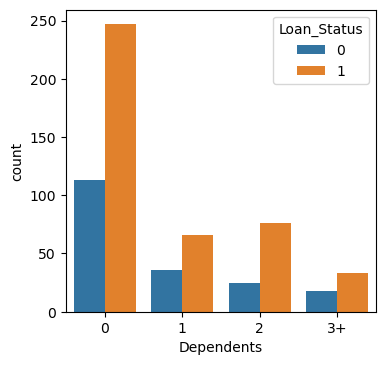

In [115]:
plt.figure(figsize=(4,4), dpi=100)
sns.countplot(data=df,x='Dependents',hue='Loan_Status' )

C:\Users\sayankrmkr\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


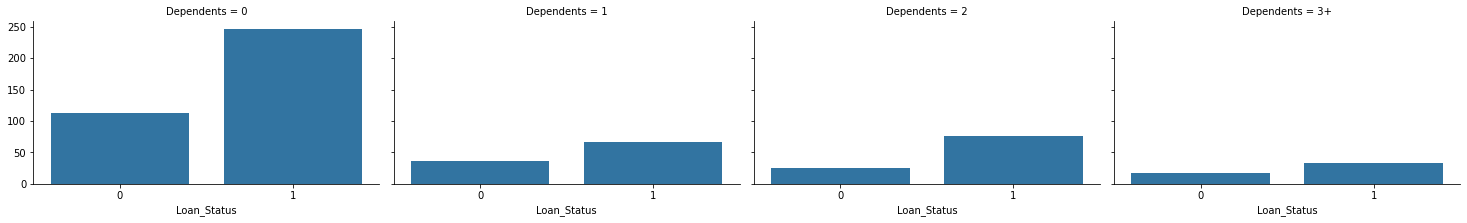

In [118]:
grid=sns.FacetGrid(data=df,col='Dependents',height=3.2, aspect=1.6)
grid.map(sns.countplot,'Loan_Status')

In [119]:
# Dependents does not seem to have a direct relationship. We can drop the dependents column

In [120]:
# Education vs Loan_Status

In [121]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

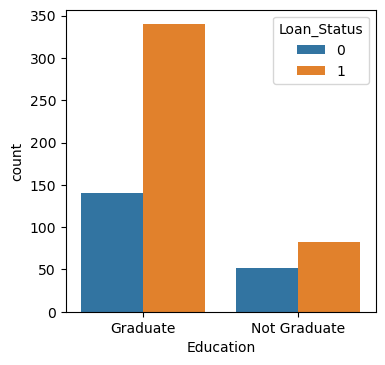

In [122]:
plt.figure(figsize=(4,4), dpi=100)
sns.countplot(data=df,x='Education',hue='Loan_Status' )

C:\Users\sayankrmkr\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


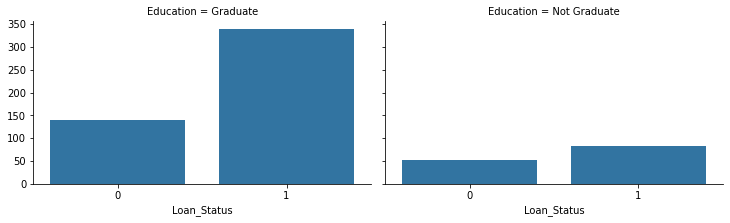

In [123]:
grid=sns.FacetGrid(data=df,col='Education',height=3.2, aspect=1.6)
grid.map(sns.countplot,'Loan_Status')

In [124]:
# In both situation people get loans but Graduates seems to get loan more

In [125]:
# Self Employed vs Education

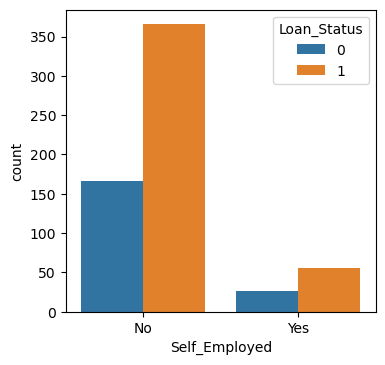

In [126]:
plt.figure(figsize=(4,4), dpi=100)
sns.countplot(data=df,x='Self_Employed',hue='Loan_Status' )

C:\Users\sayankrmkr\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


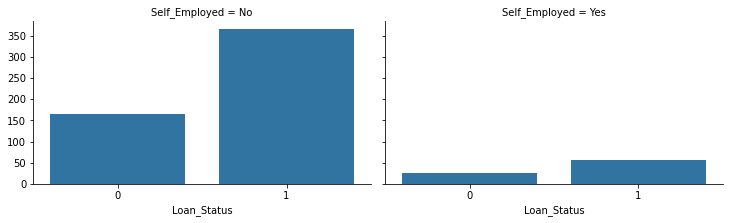

In [128]:
grid=sns.FacetGrid(data=df,col='Self_Employed',height=3.2, aspect=1.6)
grid.map(sns.countplot,'Loan_Status')

#People having jobs get loans easily

C:\Users\sayankrmkr\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


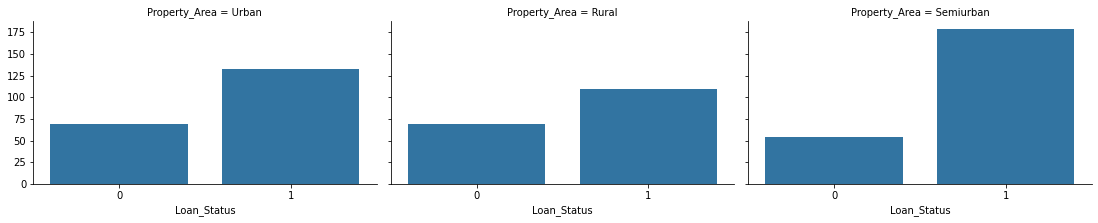

In [129]:
grid=sns.FacetGrid(data=df,col='Property_Area',height=3.2, aspect=1.6)
grid.map(sns.countplot,'Loan_Status')

In [130]:
# Semi Urban has a positive impact on Loan State. So we keep this field

In [131]:
# We check for income levels now

In [132]:
df['Total_Income']=df['ApplicantIncome']+df['CoapplicantIncome']

In [133]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0


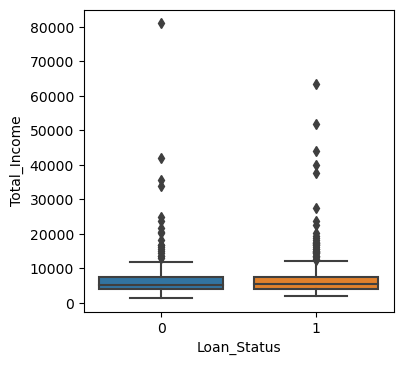

In [138]:
plt.figure(figsize=(4,4),dpi=100)
sns.boxplot(data=df,x='Loan_Status',y='Total_Income')

# No pattern is found

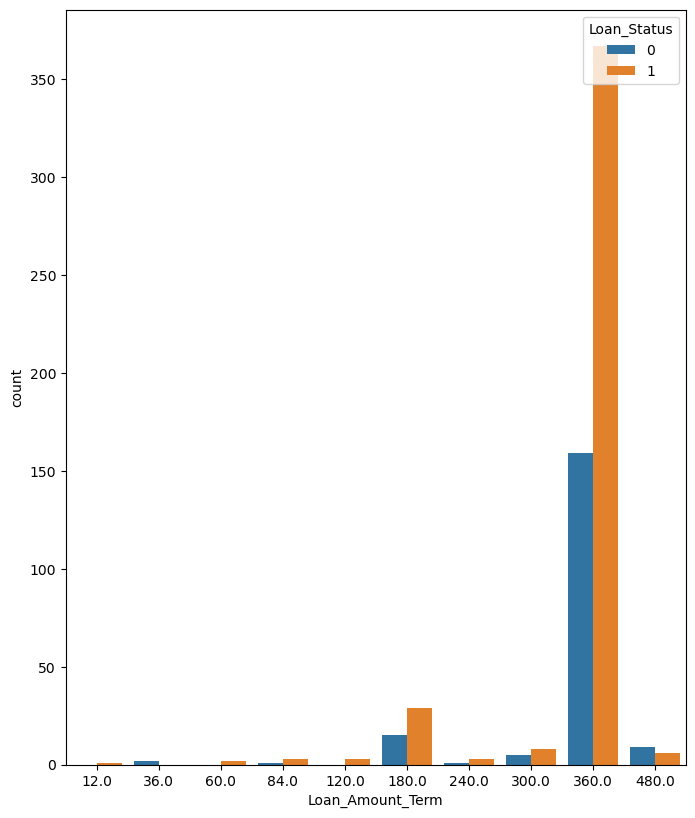

In [142]:
plt.figure(figsize=(8,10),dpi=100)
sns.countplot(data=df,x='Loan_Amount_Term', hue='Loan_Status')

#No specific pattern is observed

In [143]:
# LoanAmount vs Loan_Status

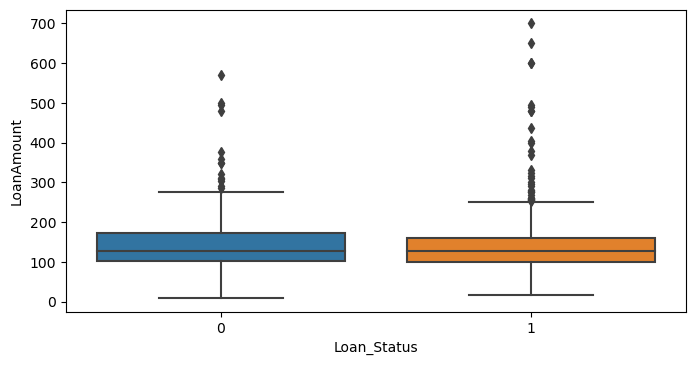

In [144]:
plt.figure(figsize=(8,4),dpi=100)
sns.boxplot(data=df,y='LoanAmount',x='Loan_Status')

## Drop features with no relation

In [149]:
cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income','Loan_ID','Dependents']
df=df.drop(columns=cols,axis=1)

In [151]:
df.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [152]:
df.head()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,1.0,Urban,1
1,Male,Yes,Graduate,No,1.0,Rural,0
2,Male,Yes,Graduate,Yes,1.0,Urban,1
3,Male,Yes,Not Graduate,No,1.0,Urban,1
4,Male,No,Graduate,No,1.0,Urban,1


## Label Encoding

In [154]:
from sklearn.preprocessing import LabelEncoder
cols=['Gender', 'Married', 'Education', 'Self_Employed','Property_Area']
le=LabelEncoder()
for x in cols:
    df[x]=le.fit_transform(df[x])

In [155]:
df.head()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,1.0,2,1
1,1,1,0,0,1.0,0,0
2,1,1,0,1,1.0,2,1
3,1,1,1,0,1.0,2,1
4,1,0,0,0,1.0,2,1


In [156]:
# Gender (M=1,F=0), Married (Y=1,N=0), Education (Grad=0, Not_Grad=1), Self_Employed(Y=1,N=0), Property_Area(Urban=2, Rural=0)

## Modelling

In [158]:
# Specify input and output attributes
X= df.drop(columns='Loan_Status',axis=1)
y=df['Loan_Status']

In [159]:
#Import
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [164]:
from sklearn.model_selection import cross_val_score
def classify(model,x,y):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=42)
    model.fit(x_train,y_train)
    print("Accuracy is ",model.score(x_test,y_test)*100)
    
    # Cross Validation is used for better validation of model
    score=cross_val_score(model,x,y,cv=5)
    print("Cross Validation is ",np.mean(score)*100)

In [176]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is  77.27272727272727
Cross Validation is  80.9462881514061


In [167]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
classify(model, X,y)

Accuracy is  75.32467532467533
Cross Validation is  78.99240303878449


## Confusion Matrix

In [168]:
from sklearn.metrics import confusion_matrix

In [178]:
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[21, 33],
       [ 2, 98]], dtype=int64)

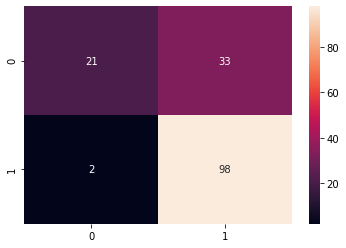

In [179]:
sns.heatmap(cm,annot=True)

## F1 Score

In [180]:
from sklearn.metrics import f1_score

In [181]:
f1_score(y_test,y_pred)

0.8484848484848484

In [182]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

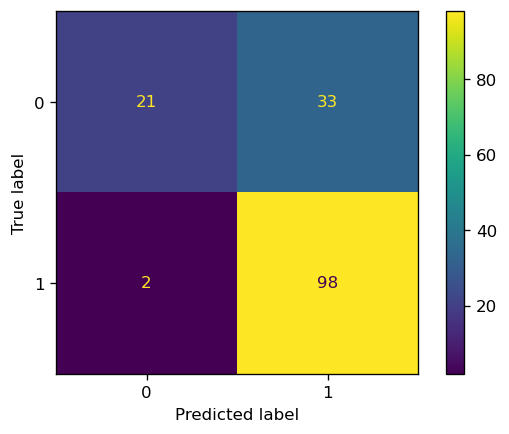

In [185]:
fig,ax = plt.subplots(dpi=120)
plot_confusion_matrix(model, x_test, y_test,ax=ax)

In [186]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154



## Feature importance

In [188]:
w0 = model.intercept_[0]

In [189]:
w0

-2.2022153087027974

In [192]:
w1,w2,w3,w4,w5,w6=model.coef_[0]

In [195]:
class_names=x_train.columns

In [201]:
from math import e
w=[w1,w2,w3,w4,w5,w6]

In [202]:
feature_importance=pd.DataFrame(class_names,columns=['features'])
feature_importance['importance']=pow(e,np.array(w))
feature_importance.sort_values(by =['importance'])

,features,importance
2,Education,0.768545
0,Gender,0.802869
3,Self_Employed,1.033145
5,Property_Area,1.136338
1,Married,1.737498
4,Credit_History,28.158350
